# Análisis tiempo-frecuencia

Uno de los principales métodos para analizar el espectro de una señal y su evolución en el tiempo está en el uso de la transformada corta de Fourier.

## Transformada de Fourier Corta en el tiempo

Esta transformada consiste en tomar segmentos cortos de tiempo.

In [2]:
# Importar librerías importantes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import scipy.signal as sn               # Scipy para procesiamiento de señales            
from scipy import fft                   # Scipy transformada rápida de Fourier
import lfpy                             # Módulo wavelets

Text(0.5, 1.0, 'Señal con frecuencias ubicadas en intervalos específicos')

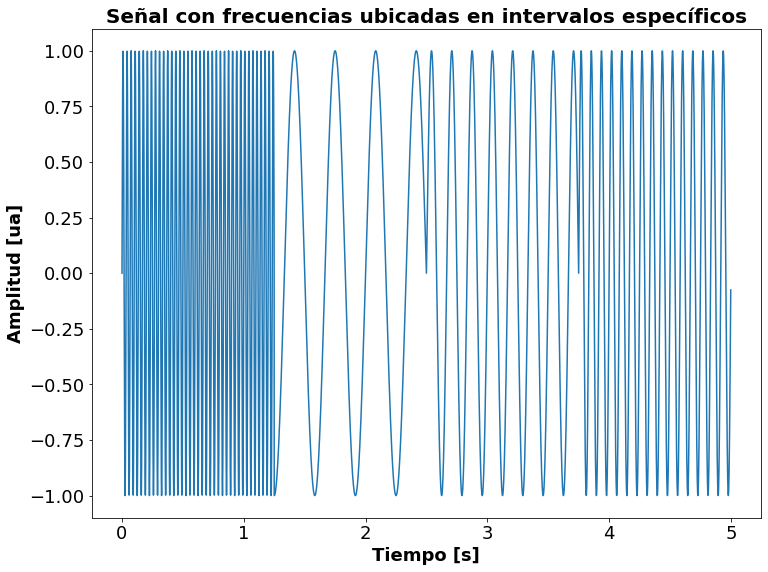

In [3]:
# Empecemos por crear una señal artificial con frecuencias ubicadas en tiempos específicos
srate=1000
t=np.arange(0, 5, 1/srate)
n=len(t)
f=(30, 3, 6, 12)
tchunks=np.int32(np.round(np.linspace(0, n, len(f)+1)))
#print(tchunks)
data=np.zeros((0))
for i in range(len(f)-1):
    data=np.concatenate((data, np.sin(2*np.pi*f[i]*t[tchunks[i]:tchunks[i+1] ])), axis=0)
data=np.concatenate((data, np.sin(2*np.pi*f[-1]*t[tchunks[-2]:: ])), axis=0)
fig, ax=plt.subplots(1,1, figsize=(12, 9))
ax.plot(t, data[0::])
ax.set_xlabel("Tiempo [s]", fontsize=18, fontweight="bold")
ax.set_ylabel("Amplitud [ua]", fontsize=18, fontweight="bold")
ax.tick_params(labelsize=18)
ax.set_title("Señal con frecuencias ubicadas en intervalos específicos", fontsize=20, fontweight="bold")

## Empecemos a hacer el análisis de tiempo frecuencia  mediante la transformada corta de Fourier

En esta primera parte las ventanas se fijarán con un ancho de 1000 ms 

In [4]:
width=1 #tiempo en s
width_n= np.int32(width*srate/2)   #Ancho en términos del número de puntos dada la frecuencia de muestreo7
traslape=0.75  #Porcentaje de traslape en las ventanas
paso=np.int32(np.round(width*srate*(1-traslape)))
print(paso)
print(width_n)

250
500


In [4]:
help(plt.specgram)

Help on function specgram in module matplotlib.pyplot:

specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, *, data=None, **kwargs)
    Plot a spectrogram.
    
    Compute and plot a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the spectrum of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*. The spectrogram is plotted as a colormap
    (using imshow).
    
    Parameters
    ----------
    x : 1-D array or sequence
        Array or sequence containing the data.
    
    Fs : float, default: 2
        The sampling frequency (samples per time unit).  It is used to calculate
        the Fourier frequencies, *freqs*, in cycles per time unit.
    
    window : callable or ndarray, default: `.

## Calculando el espectrograma.
# Uso de la función specgram de matplotlib.pyplot

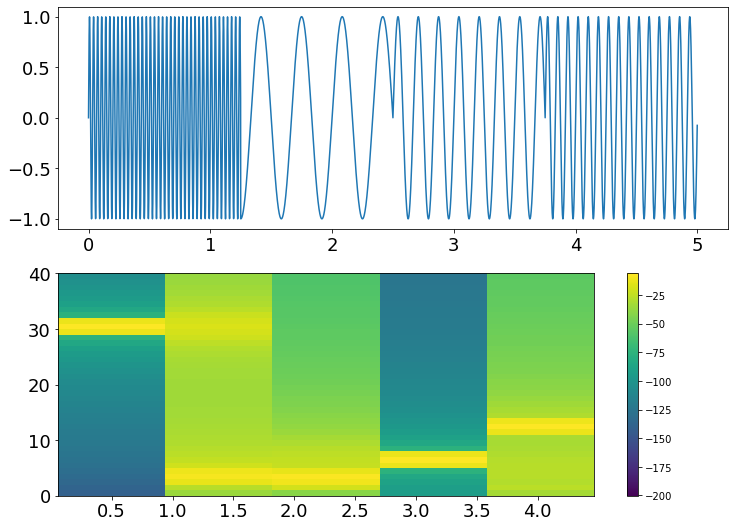

In [5]:
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, data)
Pxx, freqs, bins, im = ax[1].specgram(data, NFFT=width_n*2, cmap="viridis", Fs=np.int32(srate), noverlap=120, detrend="mean",  mode="magnitude", scale_by_freq=False)
ax[1].set_ylim([0, 40])
ax[0].tick_params(labelsize=18)
ax[1].tick_params(labelsize=18)

fig.colorbar(im)

## Función de scipy para la realización del espectrograma


(0.0, 5.0)

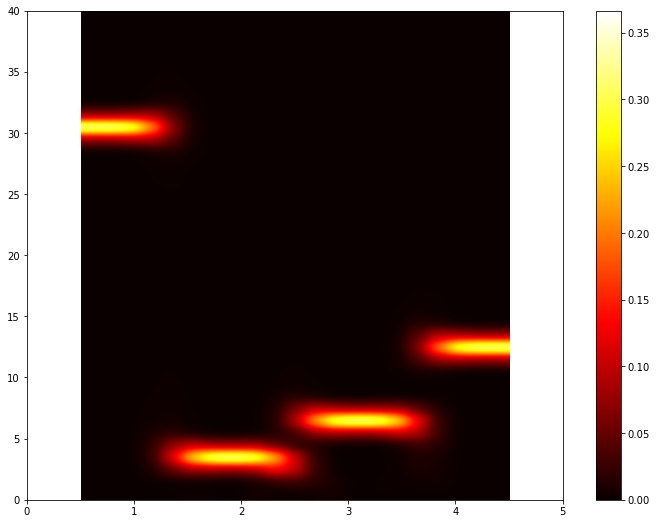

In [6]:
f, t, Sxx=sn.spectrogram(data, fs=srate, nperseg=1000, noverlap=800, window=np.hamming(1000))
fig, ax=plt.subplots(1,1, figsize=(12, 9))
cbar=ax.imshow(Sxx, aspect="auto", origin="lower", extent=[ t[0], t[-1], f[0], f[-1]], cmap="hot", interpolation="gaussian")
ax.set_ylim([0, 40])
fig.colorbar(cbar)
ax.set_xlim([0, 5])

Note como hay efectos fuertes con la aparición de frecuencias inexistentes en potencia no nula.
## Código propio

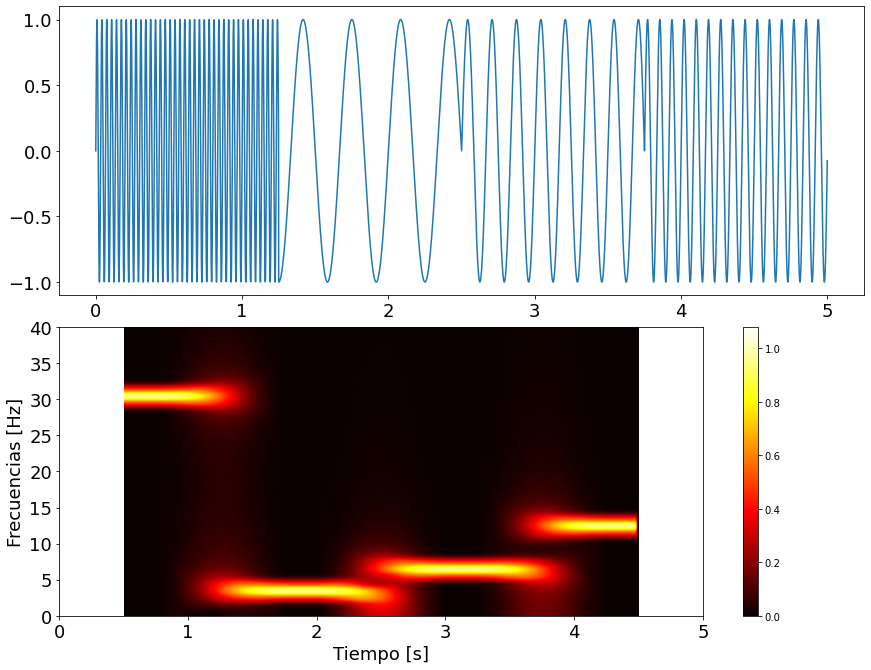

In [7]:
t=np.arange(0, 5, 1/srate)

hz=np.linspace(0, srate/2, width_n+1)
centimes=np.int32(np.round(np.linspace(width_n, n-width_n, paso)))
hammingWin=np.hamming(width_n*2)
TFmatrix=np.zeros((len(centimes), len(hz)), dtype=np.float32)
for tf in range(len(centimes)-1):
    Xdata=hammingWin*data[centimes[tf]-width_n: centimes[tf] + width_n ]
    Xdata=fft.fft(Xdata)
    Xdata=2*np.abs(Xdata[0:len(hz)])/width_n
    TFmatrix[tf, :]=Xdata

    
#Plotting
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, data)

#cbar=ax[1].contour(t[centimes], hz, TFmatrix.transpose(), levels=1000, cmap="viridis")
#ax[1].set_ylim([0, 40])
#ax[1].set_xlim([0, 5])
#plt.colorbar(cbar)
cbar=ax[1].imshow(TFmatrix.transpose(), aspect="auto", cmap='hot', extent=[t[centimes[0]], t[centimes[-1]], hz[0],hz[-1]], interpolation='gaussian', origin="lower")
ax[1].set_ylim([0, 40])
ax[1].set_xlim([0, 5])

plt.colorbar(cbar)

plt.tight_layout()
ax[1].set_xlabel("Tiempo [s]", fontsize=18)
ax[1].set_ylabel("Frecuencias [Hz]", fontsize=18)
ax[0].tick_params(labelsize=18)
ax[1].tick_params(labelsize=18)

Note como hay una mejora en la calidad del espectrograma, esto es. Se observa una mejor resolución en frecuencia de modo que las bandas son perfectamente notorias.

Por otro lado, una mejor forma de calcular el espectrograma o análisis tiempo-frecuencia requiere del uso de ventanas variables según la frecuencia.
Observemos otro ejemplo:

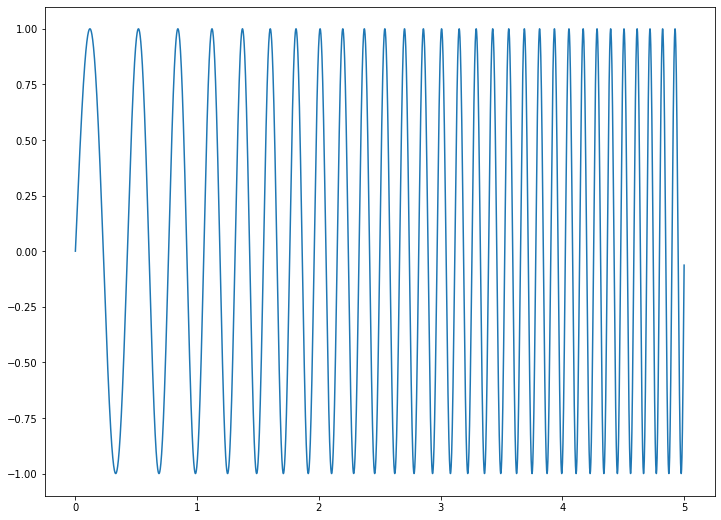

In [4]:
# Creación de la señal artificial
srate=1000                                                              # Frecuencia de muestreo
t = np.arange(0, 5 , 1/srate)                                  # Vector de tiempo en segundos
nyquistfreq=srate/2                                               # Frecuencia de Nyquist
f=(2, 10)                                              
n=len(t)
#ff=np.linspace(f[0], f[1]*6/f[1], n)
#senal =np.sin(2*np.pi*ff*t)                                         # Creación de la señal
senal=np.sin(np.pi*t**2*(f[1]-f[0])/5 + 2*np.pi*f[0]*t)
fig, ax=plt.subplots(1, 1, figsize=(12, 9))
ax.plot(t, senal)


(1.0, 40.0)

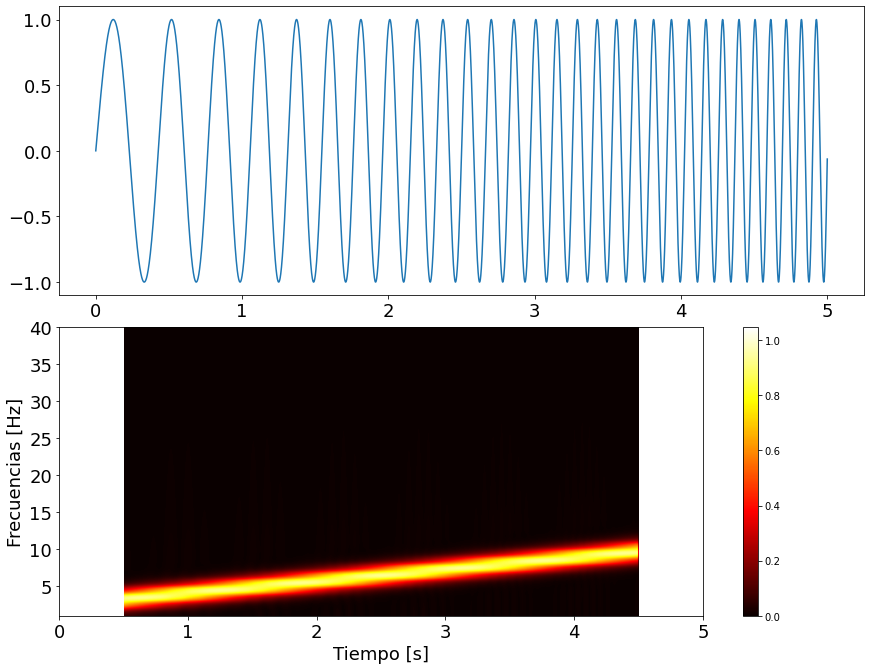

In [9]:
hz, T2, Power, Im=lfpy.Spectrogram(senal, srate, width=1, noverlap=0.2, plotting=True)
plt.ylim([1, 40])

## **Espectrograma tiempo frecuencia calculado mediante la convolución con wavelets de Morlet complejas**


Las wavelet de Morlet complejas están definidas como:

$mwv=\frac{1}{\sqrt{s\sqrt{\pi}}} e^{\frac{-t^2}{2s^2}}e^{i2\pi ft}$

Donde:
$s=\frac{\#Ciclos}{2\pi f}$

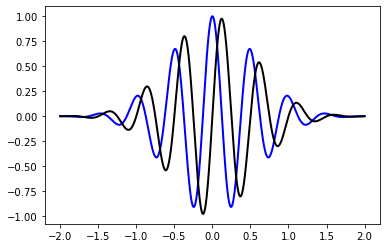

In [1]:
# Pruebas 
import numpy as np
import matplotlib.pyplot as plt
t=np.arange(-2, 2, 0.001)  # el delta es el inverso de la f_samp
fwav=2    #Frecuencia de la wavelet de Morlet
nciclos=7
w=2*(nciclos/(2*np.pi*fwav))**2
Gaussiana=np.exp((-t**2)/w)
mwavelet=np.exp(1j*2*np.pi*fwav*t)*Gaussiana
plt.plot(t, mwavelet.real, c='b', linewidth=2)
plt.plot(t, mwavelet.imag, c='k', lw=2)


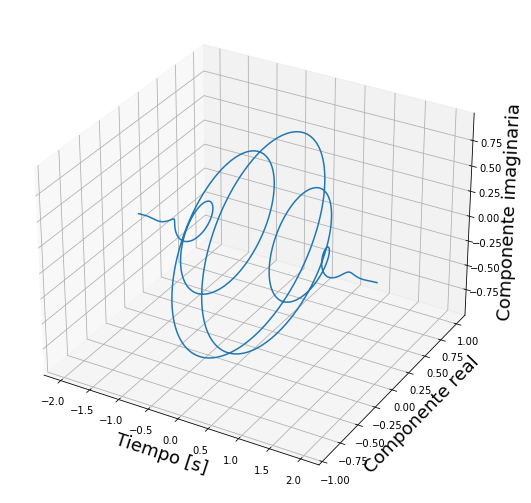

In [2]:
ax = plt.figure(figsize=(12, 9)).add_subplot(111, projection = '3d')

ax.plot(t, mwavelet.real, mwavelet.imag)
ax.set_xlabel("Tiempo [s]", fontsize=18)
ax.set_ylabel("Componente real", fontsize=18)
ax.set_zlabel("Componente imaginaria", fontsize=18)
plt.show()

# Convolución con wavelets complejas: Método 1. 

## Haciendo uso de la transformada rápida de Fourier mediante el método del teorema de convolución.

In [11]:
# Uso del análisis mediante la convolución por wavelets complejas manteniendo el número de ciclos fijo (7 ciclos)
import scipy.fft as fft
srate=1000                                                            
nyquistfreq=srate/2   # Frecuencia de Nyquist
#hz=np.logspace(np.log10(1), np.log10(nyquistfreq))    # Generación de frecuencias espaciadas logarítmicamente
hz=np.linspace(1, nyquistfreq, 300)    # Generación de frecuencias espaciadas linealmente
Nciclos=20
t=np.arange(-1, 1, 1/srate)
nwav=len(t)

Lconv=len(senal) + nwav-1   #Longitud de la convolución
print(Lconv)
TFmatrix=np.zeros((len(hz), Lconv), dtype=np.float32)
#Comienza el ciclo por frecuencicas
row=0
for fwav in hz:    
    ## Creación de la wavelet de Morlet compleja
    w=2*(Nciclos/(2*np.pi*fwav))**2
    Gaussiana=np.exp((-t**2)/w)
    mwavelet=np.exp(1j*2*np.pi*fwav*t)*Gaussiana

    mwaveletX=fft.fft(mwavelet, Lconv)
    mwaveletX=mwaveletX/max(mwaveletX)
    convolucionada=fft.fft(senal, Lconv)*mwaveletX
    conv=fft.ifft(convolucionada)
    TFmatrix[row, :]=2*np.abs(conv)
    row+=1

6999


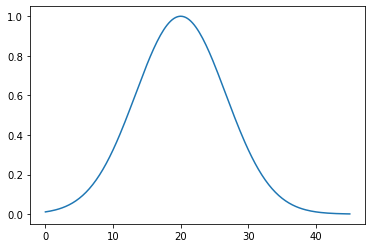

In [12]:
srate=90
t=np.arange(-2, 2, 1/srate)
w=2*(3/(2*np.pi*20))**2
Gaussiana=np.exp((-t**2)/w)
mwavelet=np.exp(1j*2*np.pi*20*t)*Gaussiana
mwaveletX=fft.fft(mwavelet)
mwaveletX=mwaveletX/max(mwaveletX)
hz=np.linspace(0, srate/2, len(t)//2 +1)
plt.plot(hz, np.abs(mwaveletX[0:len(hz)]))

(0.0, 40.0)

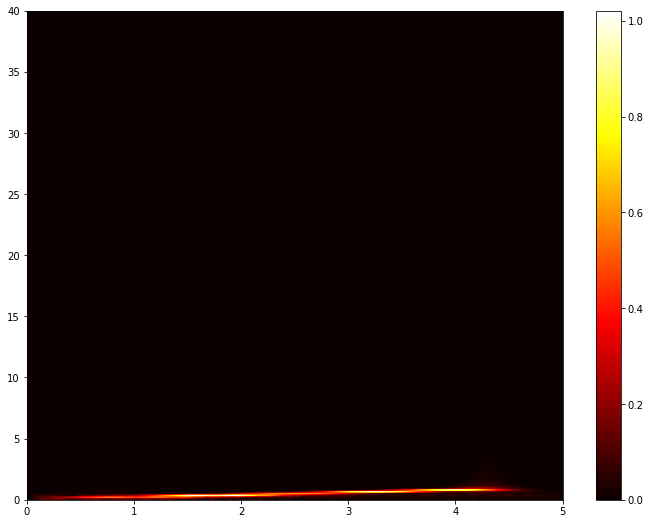

In [14]:
fig, ax=plt.subplots(1,1, figsize=(12, 9))
#cbar=ax.imshow(TFmatrix[:, nwav//2-1:-1-nwav//2+1:1], cmap="hot", origin="lower", aspect="auto", extent=[0, 5, hz[0], hz[-1]])
cbar=ax.imshow(TFmatrix, cmap="hot", origin="lower", aspect="auto", extent=[0, 5, hz[0], hz[-1]])

fig.colorbar(cbar)

ax.set_ylim([0, 40])

## Método 2. Análisis tiempo-frecuencia, mediante directamente la convolución: utilizando la convolución scipy.signal.convolve

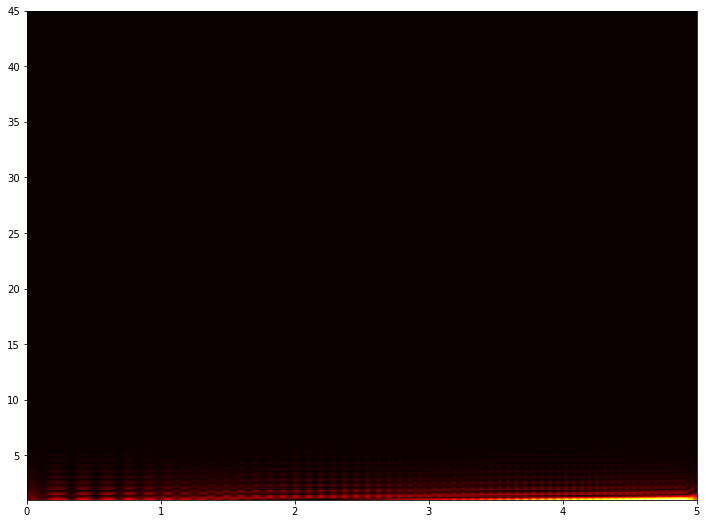

In [17]:
# Uso del análisis mediante la convolución por wavelets complejas manteniendo el número de ciclos fijo (7 ciclos)
#srate=1000 
import scipy.signal as sn
nyquistfreq=srate/2   # Frecuencia de Nyquist
#hz=np.logspace(np.log10(1), np.log10(nyquistfreq))    # Generación de frecuencias espaciadas logarítmicamente
hz=np.linspace(1, nyquistfreq, 300)    # Generación de frecuencias espaciadas linealmente
Nciclos=20
t=np.arange(-1, 1, 1/srate)


TFmatrix=np.zeros((len(hz), len(senal)), dtype=np.float32)
#Comienza el ciclo por frecuencicas
row=0
for fwav in hz:    
    ## Creación de la wavelet de Morlet compleja
    w=2*(Nciclos/(2*np.pi*fwav))**2
    Gaussiana=np.exp((-t**2)/w)
    mwavelet=np.exp(1j*2*np.pi*fwav*t)*Gaussiana
    convolucionada=sn.convolve(senal, mwavelet, mode="same")   #Convolución
    TFmatrix[row, :]=2*np.abs(convolucionada)
    row+=1
hz2=hz[hz<50]
plt.figure(figsize=(12, 9))
plt.imshow(TFmatrix[0:len(hz2), :], aspect="auto", origin="lower", cmap="hot", extent=[0, 5, hz[0], hz[-1]])

In [16]:
# Uso del análisis mediante la convolución por wavelets complejas manteniendo el número de ciclos fijo (7 ciclos)
#srate=1000                                                            

#Comienza el ciclo por frecuencicas


def wavconv(Nciclos=5, dur=1):
    srate=1000                                                              # Frecuencia de muestreo
    t = np.arange(0, 5 , 1/srate)                                  # Vector de tiempo en segundos
    nyquistfreq=srate/2                                               # Frecuencia de Nyquist
    f=(2, 10)                                              
    n=len(t)
    #ff=np.linspace(f[0], f[1]*6/f[1], n)
    #senal =np.sin(2*np.pi*ff*t)                                         # Creación de la señal
    senal=np.sin(np.pi*t**2*(f[1]-f[0])/5 + 2*np.pi*f[0]*t)
    nyquistfreq=srate/2   # Frecuencia de Nyquist
    hz=np.linspace(1, nyquistfreq, 300)    # Generación de frecuencias espaciadas linealmente
    t=np.arange(-dur, dur, 1/srate)
    nwav=len(t)

    TFmatrix=np.zeros((len(hz), len(senal)), dtype=np.float32)
    row=0
    for fwav in hz:    
        ## Creación de la wavelet de Morlet compleja
        w=2*(Nciclos/(2*np.pi*fwav))**2
        Gaussiana=np.exp((-t**2)/w)
        mwavelet=np.exp(1j*2*np.pi*fwav*t)*Gaussiana
        convolucionada=sn.convolve(senal, mwavelet, mode="same")   #Convolución
        TFmatrix[row, :]=2*np.abs(convolucionada)
        row+=1
    hz2=hz[hz<50]
    plt.figure(figsize=(12, 9))
    plt.imshow(TFmatrix[0:len(hz2), :], aspect="auto", origin="lower", cmap="hot", extent=[0, 5, hz2[0], hz2[-1]])
    
    
    

In [61]:
from ipywidgets import interact
interact(wavconv, 
         Nciclos=(1, 40, 1), 
         dur=(1, 10, 1),
         )

interactive(children=(IntSlider(value=5, description='Nciclos', max=40, min=1), IntSlider(value=1, description…

<function __main__.wavconv(Nciclos=5, dur=1)>

# Uso de la función con wavelets para hacer espectrogramas

Note que la función se llama MorlerWaveletSpectrogram, vea la documentación para un mayor detalle de su funcionamiento.

In [19]:
from importlib import reload
reload(lfpy)
frecuencias=np.linspace(2, srate//2, len(senal)//2 +1)
frecuencias=frecuencias[frecuencias<=30]
NumCiclos=np.int32(np.linspace(3, 25, len(frecuencias)))
hz, TFmatrix=lfpy.MorletWaveletSpectrogram(senal, srate, Ncicles=NumCiclos, freqs=frecuencias, lentimewav=3)
#fig, ax=plt.subplots(1,1, figsize=(12, 9))
#cbar=ax.pcolor(np.arange(0, 5, 1/srate), hz, TFmatrix, shading="auto", cmap="spectral")
#fig.colorbar(cbar)
#ax.set_ylim([0, 40])

141


(141,)
(141, 5000)
(2000,)


(0.0, 30.0)

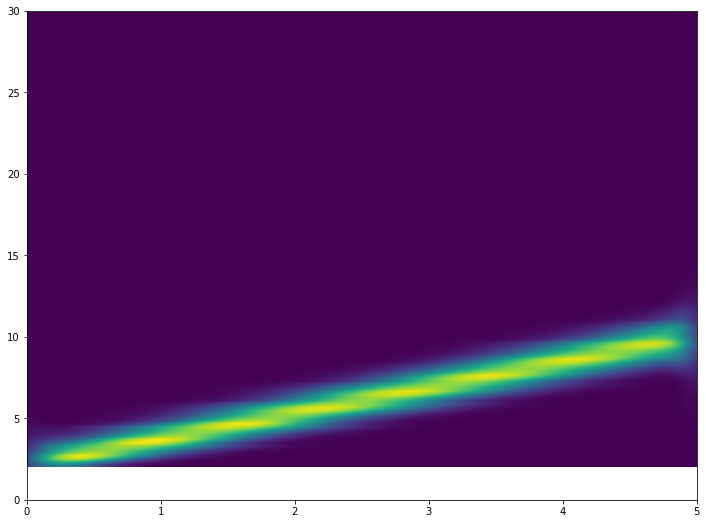

In [20]:
print(hz.shape)
print(TFmatrix.shape)
print(t.shape)
plt.figure(figsize=(12, 9))
plt.imshow(TFmatrix, origin="lower", aspect="auto", extent=[0, 5, hz[0], hz[-1]], interpolation="gaussian")
plt.ylim([0, 30])

In [21]:
# Gráfico del ancho de banda según la frecuencia:
plt.plot(hz, fwhmvec)
plt.xlim([0, 30])
plt.xlabel("frecuencia [hz]", fontsize=12)
plt.ylabel("Ancho a la amplitud media fwhm [hz]", fontsize=12)

NameError: name 'fwhmvec' is not defined

## Cómo elegir el número de ciclos para conocer el fwhm del filtro gaussiano?

Para conocer el ancho del filtro , se realizará una gráfica donde se variará el número de ciclos así como la frecuencia, de este modo, para un cierto valor de frecuencia, número de ciclos, se podrá determinar el ancho del filtro que maneja la wavelet de Morlet.

**Un resultado interesante es que de 5 a 20 Ciclos se mantiene un ancho pequeño cuando las frecuencias son menores a 50 Hz. Note cómo esto coincide con la gráfica de arriba.**

In [22]:
fsamp=1000 # Frecuencia de muestreo en Hz
tdur= 3    # semiduración de la wavelet en segundos. 
Nciclos=np.arange(1, 70, 1)
f=np.arange(1, 200, 2)
Ancho=np.zeros((len(Nciclos), len(f)), dtype=np.float32)
for ciclos in range(len(Nciclos)):
    for freqs in range(len(f)):
        try:
            _, Ancho[ciclos, freqs]=lfpy.WaveletMorlet(fsamp, Nciclos[ciclos], f=f[freqs], t=tdur, fwhm=True, rsp=False)
        except:
            Ancho[ciclos, freqs]=np.inf
            
FWHM_guide={"Ancho":Ancho, "frecuencias": f, "Nciclos":Nciclos}
np.save("FWHM_guide.npy", FWHM_guide, allow_pickle=True, fix_imports=False)

(1.0, 100.0)

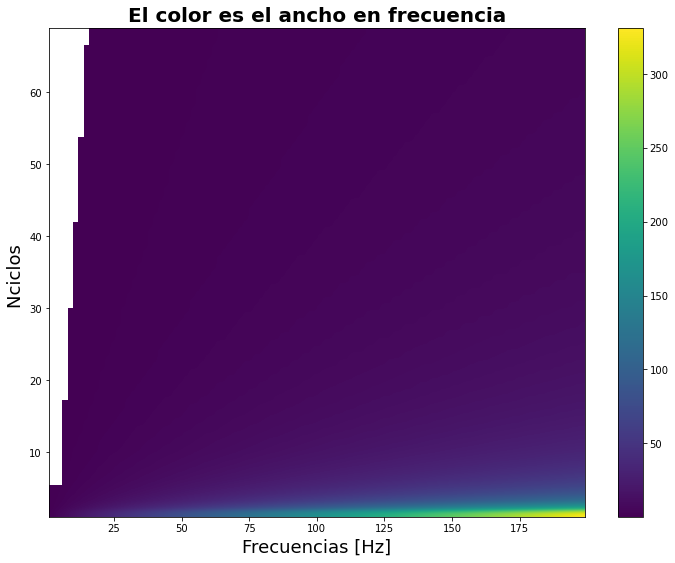

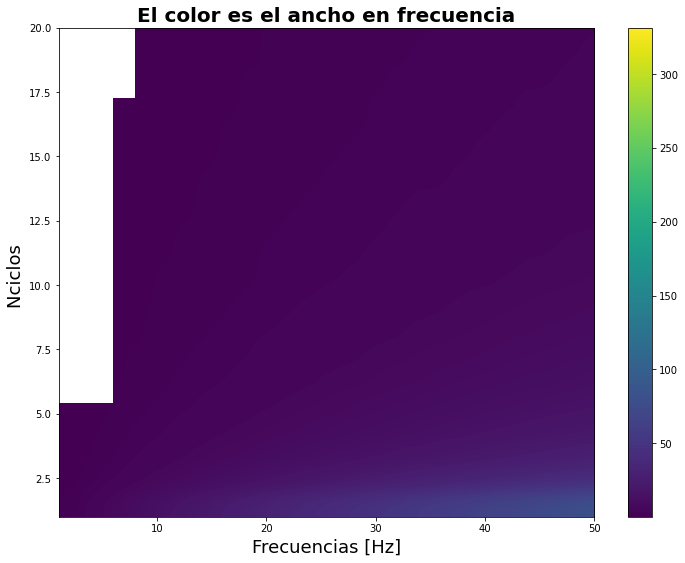

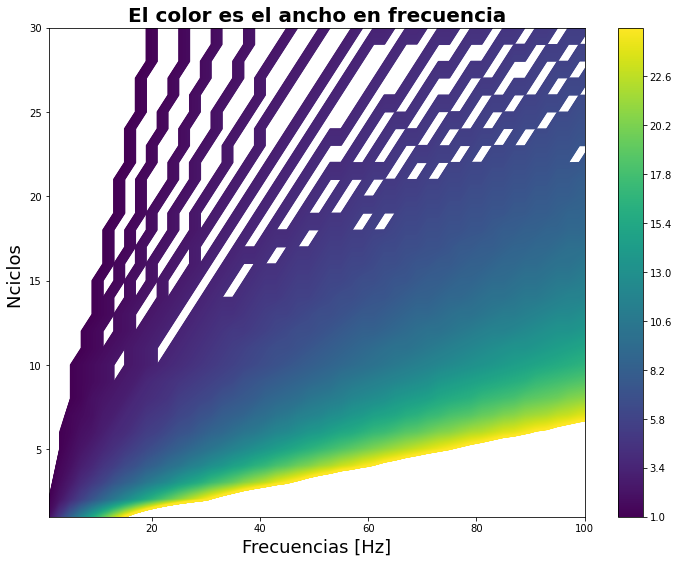

In [23]:
plt.figure(figsize=(12, 9))
cbar=plt.imshow(Ancho, extent=[f[0], f[-1], Nciclos[0], Nciclos[-1]], aspect="auto", origin="lower", interpolation="gaussian")
plt.xlabel("Frecuencias [Hz]", fontsize=18)
plt.ylabel("Nciclos ", fontsize=18)
plt.colorbar(cbar)
plt.title("El color es el ancho en frecuencia", fontsize=20, fontweight="bold")

#plt.figure(figsize=(12, 9))
#cbar=plt.imshow(Ancho, extent=[f[0], f[-1], Nciclos[0], Nciclos[-1]], aspect="auto", origin="lower", interpolation="gaussian")
#plt.xlabel("Frecuencias [Hz]", fontsize=18)
#plt.ylabel("Nciclos ", fontsize=18)
#plt.colorbar(cbar)
#plt.title("El color es el ancho en frecuencia", fontsize=20, fontweight="bold")
#plt.ylim([1, 20])

plt.figure(figsize=(12, 9))
cbar=plt.imshow(Ancho, extent=[f[0], f[-1], Nciclos[0], Nciclos[-1]], aspect="auto", origin="lower", interpolation="gaussian")
plt.xlabel("Frecuencias [Hz]", fontsize=18)
plt.ylabel("Nciclos ", fontsize=18)
plt.colorbar(cbar)
plt.title("El color es el ancho en frecuencia", fontsize=20, fontweight="bold")
plt.ylim([1, 20])
plt.xlim([1, 50])

plt.figure(figsize=(12, 9))
cbar=plt.contour(f, Nciclos, Ancho, levels=np.arange(1, 25, 0.01))
plt.xlabel("Frecuencias [Hz]", fontsize=18)
plt.ylabel("Nciclos ", fontsize=18)
plt.colorbar(cbar)
plt.title("El color es el ancho en frecuencia", fontsize=20, fontweight="bold")
plt.ylim([1, 30])
plt.xlim([1, 100])

In [16]:
plt.contour?

## Análisis singular espectral.

En esta parte se ilustra el método sobre este tipo de análisis en series de tiempo. Así como la aplicación a algunas series de tiempo y su uso como preprocesamiento para el anális de fase mediante la transformada de Hilbert.

Esto se realizará en los siguientes pasos:

1. Construcción de una señal con componentes aislados en el tiempo
2. Generación del método paso a paso
3. Generación de la función que resuelve el problema
4. Aplicaciones a algunas señales simuladas
5. Aplicaciones a algunas señales de LFP
6. Uso en conjunto con la transformada de Hilbert.



## Paso 1: Construcción de una señal con componentes aislados en el tiempo

Consideremos tres distintas señales. La primera será simplemente un conjunto de señales a distinta frecuencia con ruido blanco

$$snl1=A\sum_{i=1}^{n}\sin(2*\pi f_i t + \phi) + \epsilon$$ Donde $\epsilon$ es ruido blanco con el doble de amplitud



Text(0, 0.5, 'Amplitude [ua]')

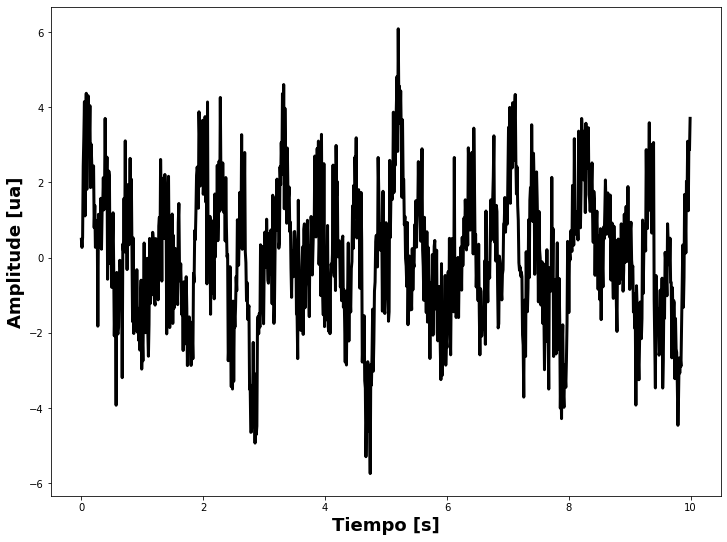

In [91]:
k=10
amp=1
srate=100
t=np.arange(0, 10, 1/srate)
snl1=np.zeros((len(t)), dtype=np.float32)
for fi in ((np.sqrt(5)-1)/2, 1, 2/(np.sqrt(5)-1),  np.exp(1), np.pi):
    snl1+=amp*np.sin(2*np.pi*fi*t)
snl1+=np.random.normal(0, amp, size=len(t))

plt.figure(figsize=(12, 9))
plt.plot(t, snl1, c="k", lw=3, label="snl1")
plt.xlabel("Tiempo [s]", fontsize=18, fontweight="bold")
plt.ylabel("Amplitude [ua]", fontsize=18, fontweight="bold")

## Paso 2: Generación del método paso a paso

El método de análisis singular espectral se compone de los siguientes pasos:
1. Descomposición
   1.1 Construcción del embedding o matriz de autocovarianza 
   1.2 Descomposición en valores singulares (Singular Value Decomposition)
   
2. Reconstrucción

La matriz de embedding Hankeliana tiene dimensiones.  (50, 951)


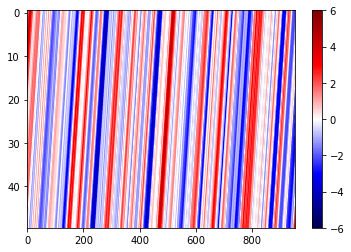

In [29]:
N=len(snl1)
l=np.int64(0.5*srate)
k=np.int64(N-l+1)
min_kl=np.min([k, l])
Hankel=np.zeros((l, k), dtype=np.float32)
print("La matriz de embedding Hankeliana tiene dimensiones. ", np.shape(Hankel))
for i in range(k):
    Hankel[:, i ] = snl1[i: i + l]

plt.imshow(Hankel, aspect="auto", vmin=-6, vmax=6, cmap="seismic")
plt.colorbar()

## Prueba de la recuperación

In [54]:
yrec=np.zeros((N), dtype=np.float32)
yrec[0] =Hankel[0, 0]
suma=1
for i in range(1, k): #Hacemos todas las columnas 
    min_il =np.min([i, l-1]) #l=4,  k=un resto, i=5
    ren=np.arange(min_il, -1,-1, dtype=np.int64)
    yrec[i]=np.mean(Hankel[ren, np.int64(suma-ren)])    
    suma+=1
# Aquí haremos las últimas columnas
ending=0
for i in range(l-2): # La últimas antidiagonales
    ren=np.arange(l-1, ending , -1)
    yrec[ k +i]=np.mean(Hankel[ren,  np.int64(suma-ren)])
    suma+=1
    ending+=1
yrec[-1]=Hankel[-1, -1] 
print(np.min(yrec-snl1), np.max(yrec-snl1))
#yrec[0: k]-snl1[0:k]

-4.7683716e-07 9.536743e-07


In [94]:
def ssa(snl1, window=0.5, sv_ratio=0.5, return_eig=False, **kwargs):

# Paso 1: Embedding
    # El Embedding para generar la matriz de Hankel
    N=len(snl1)
    k=np.int64(window*srate)
    j=np.int64( N + 1 - k)
    Hankel=np.zeros((k, j), dtype=np.float32)
    for i in range(k):
        Hankel[i, : ] = snl1[i: i + j]

    # 1.2 Descomposición en valores singulares
    U, D, VT=np.linalg.svd(Hankel, full_matrices=True)
    #VT=VT[0:min_kl, 0:min_kl]
    Dcumsum=np.cumsum(D)
    ## Paso 2: Reconstrucción:
    n=np.max(np.where(np.diag(D)/D[0]>sv_ratio)[0])  # Selección de las primeras componentes
    #print("Se tomarán los %d componentes"%(n))
    Y =np.dot(U[:,0: n ], np.diag(D[0:n]))#*VT[: , 0: n ];
    Y=np.dot(Y, np.transpose(VT[:, 0:n]))  # Primer grupo 
    #print("La dimension de Y es: ", Y.shape)
    # Hankelización mediante la suma sobre las diagonales de Hankel (i + j=const)
    yrec=np.zeros((N), dtype=np.float32)
    yrec[0] =Y[0, 0]
    suma=1
    for i in range(1, np.size(Y, axis=1)): #Hacemos todas las columnas 
        min_il =np.min([i, np.size(Y, axis=0)-1]) #l=4,  k=un resto, i=5
        ren=np.arange(min_il, -1,-1, dtype=np.int64)
        yrec[i]=np.mean(Y[ren, np.int64(suma-ren)])    
        suma+=1
    # Aquí haremos las últimas columnas
    ending=0
    for i in range(np.size(Y, axis=0)-2): # La últimas antidiagonales
        ren=np.arange(np.size(Y, axis=0)-1, ending , -1)
        yrec[ np.size(Y, axis=1) +i]=np.mean(Y[ren,  np.int64(suma-ren)])
        suma+=1
        ending+=1
    yrec[-1]=Y[-1, -1]  
    # Exracción de los componentes principales de la señal
    y_comp=np.zeros((n, N), dtype=np.float32)
    for kk in range(n):
        Y2=U[:, kk]*D[kk]
        #print("U  es de tamao; ", U.shape )
        #print("VT  es de tamao; ", VT.shape )
        Y2=np.dot(np.reshape(Y2, (k, 1)), np.reshape(VT[:, kk], (1, j)))  # Primer grupo 
        #print("y2 es de tamao ", Y2.shape)
        y_comp[kk, 0]=Y2[0, 0]
        suma=1
        for i in range(1, np.size(Y2, axis=1)): #Hacemos todas las columnas 
            min_il =np.min([i, np.size(Y2, axis=0)-1]) #l=4,  k=un resto, i=5
            ren=np.arange(min_il, -1,-1, dtype=np.int64)
            y_comp[kk, i]=np.mean(Y2[ren, np.int64(suma-ren)])    
            suma+=1
        # Aquí haremos las últimas columnas
        ending=0
        for i in range(np.size(Y2, axis=0)-2): # La últimas antidiagonales
            ren=np.arange(np.size(Y2, axis=0)-1, ending , -1)
            y_comp[kk, np.size(Y2, axis=1)+i]=np.mean(Y2[ren,  np.int64(suma-ren)])
            suma+=1
            ending+=1
        y_comp[kk, -1]=Y2[-1, -1] 
    if return_eig:
        return yrec, y_comp, D
    else: 
        return yrec, y_comp


In [86]:
y_rec, y_comp, D=ssa(snl1, window=1, sv_ratio=0.1)

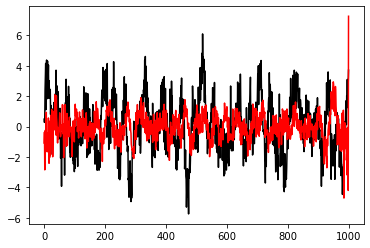

In [92]:
plt.plot(snl1, c="black")
plt.plot(y_rec, c="red")


La matriz de PC es:  (3, 1000)


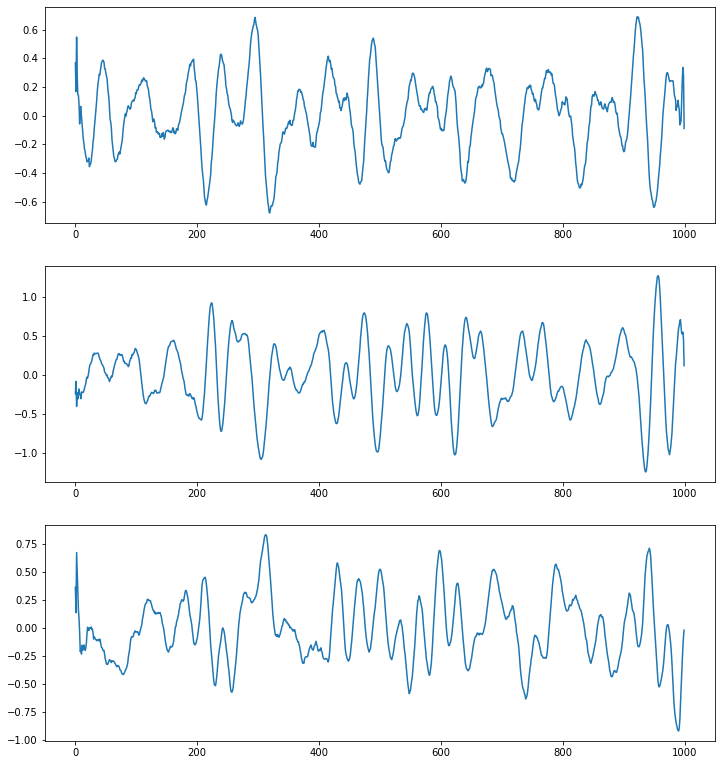

In [69]:
print("La matriz de PC es: ", y_comp.shape)

fig, ax=plt.subplots(np.size(y_comp, axis=0), 1, figsize=(12, 9*1.5))
count=0
for i in ax:
    i.plot(y_comp[count, :])
    count+=1


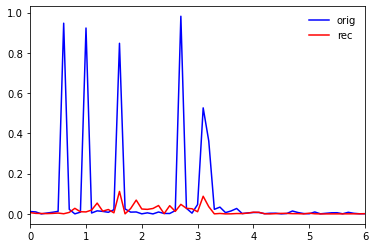

In [93]:
snl1X=fft.rfft(snl1)
y_recX=fft.rfft(y_rec)
hz=np.linspace(0, srate//2, len(snl1)//2 + 1)
plt.plot(hz, (2*np.abs(snl1X)/len(snl1))**2, c="blue", label="orig")
plt.plot(hz, (2*np.abs(y_recX)/len(y_rec))**2, c="red", label="rec")
plt.xlim([0, 6])
plt.legend(loc="best", frameon=False)